<a href="https://www.kaggle.com/code/tmkartikeypillay/beginner-friendly-titanic-lr?scriptVersionId=126020385" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# Reading the necessary data

In [2]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')

In [3]:
test = pd.read_csv('/kaggle/input/titanic/test.csv')

## EDA ,Data cleaning and Making necessary Visualization

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

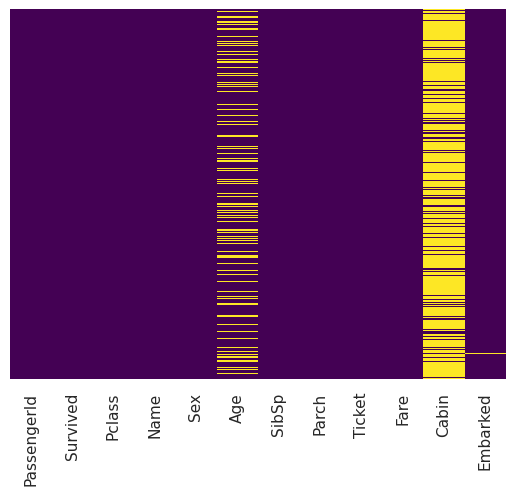

In [6]:
#visualizing the missing data
sns.heatmap(train.isna(),yticklabels=False,cmap='viridis', cbar=False)

a lot of age data is missing we would have to perform data cleaning, we can drop the cabin 

<AxesSubplot:xlabel='Survived', ylabel='count'>

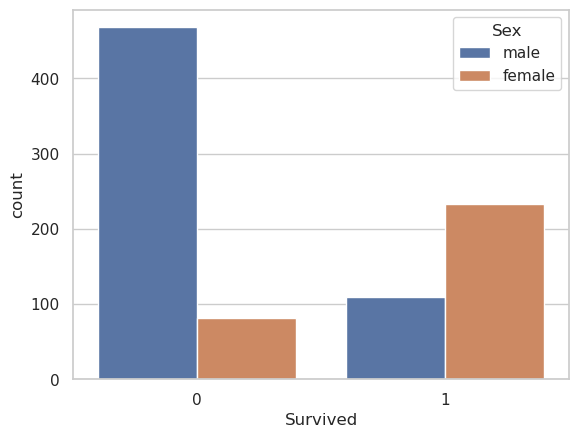

In [7]:
# survivors by the gender they belonged too
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

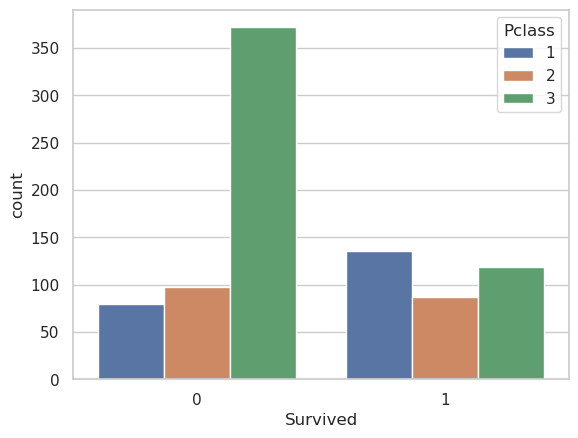

In [8]:
#survivors by the class they belonged to 
sns.countplot(x='Survived',hue='Pclass',data=train)

hence we can see that there are a lot more people who survived and belonged to higher class
 

In [9]:
train['Died']=1-train['Survived']

<AxesSubplot:xlabel='Sex'>

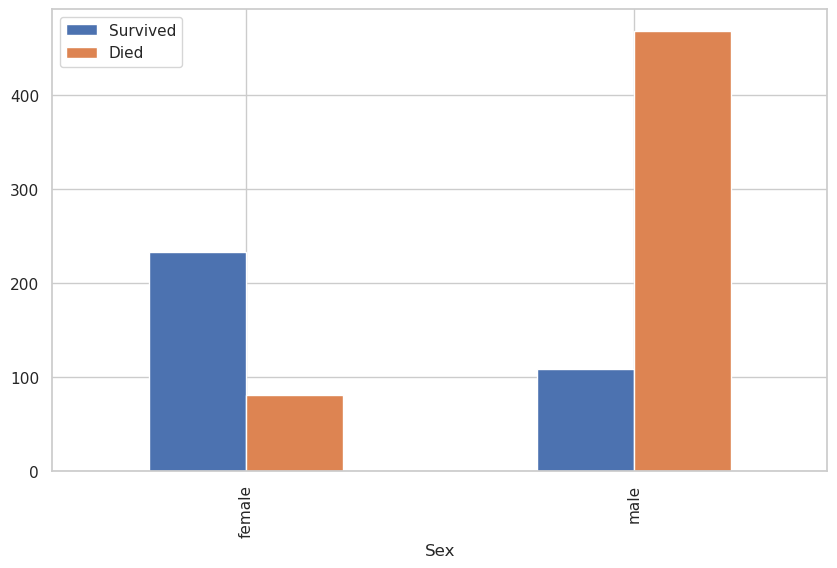

In [10]:
x = train.groupby('Sex').agg(sum)[['Survived','Died']]
x.plot(kind='bar',figsize = (10,6))

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

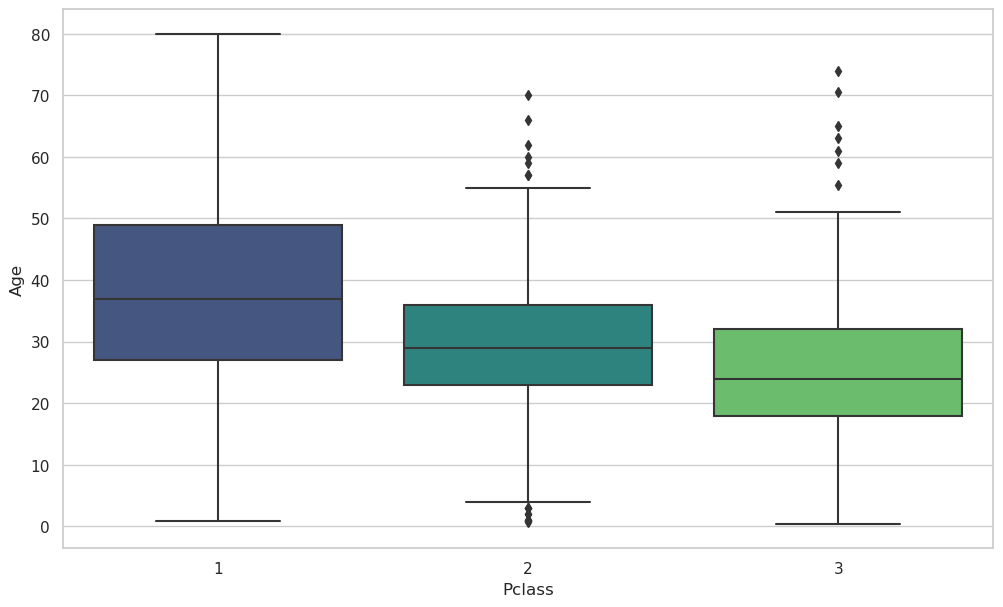

In [11]:
#finding the mean age of various classes 
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='viridis')

hence wealthier passenger where more likely to survive. Lets replace the missing 'age' with the hekp of a function

In [12]:
def mean_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
        
        elif Pclass == 2:
            return 29
        
        else:
            return 24
    
    else:
        return Age
    

In [13]:
train['Age'] = train[['Age','Pclass']].apply(mean_age, axis=1)

<AxesSubplot:>

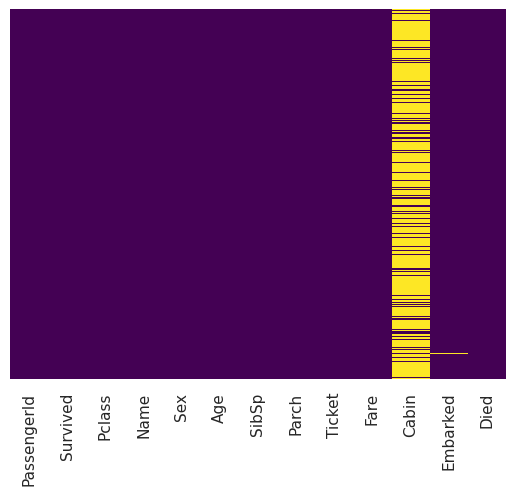

In [14]:
#lets make a heatmap again or just use 

#train.isnull().sum()

sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
#its better to drop the cabin as it had too many nan values
train.drop('Cabin', axis=1, inplace=True)

In [16]:
print(train.isnull().sum())
print(train.shape)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
Died           0
dtype: int64
(891, 12)


Embarked has two null values and we have 891 rows lets just drop the two rows with null values

In [17]:
train.dropna(inplace=True)

In [18]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Died
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.45,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C,0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Q,1


as 'name' and 'ticket' featured will not contribute anything useful to our algorithem and 'died' is 1-survived we have to drop this attributes

In [19]:
train.drop(['Name','Ticket','Died'], axis=1, inplace=True)

In [20]:
train.shape

(889, 9)

# Converting the categorical Features

In [21]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [22]:
train.drop(['Sex','Embarked'], axis=1, inplace=True)

In [23]:
train = pd.concat([train,sex,embark],axis=1)

In [24]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.019314,0.524184,0.382452,32.096681,0.649044,0.086614,0.724409
std,256.998173,0.486260,0.834700,13.209814,1.103705,0.806761,49.697504,0.477538,0.281427,0.447063
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,668.000000,1.000000,3.000000,36.500000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


# Data modelling 

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.20, 
                                                    random_state=10,stratify=train['Survived'])

## Training the model and making prediction using y_test

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
logrig = LogisticRegression()
logrig.fit(X_train,y_train)

LogisticRegression()

In [29]:
prediction = logrig.predict(X_test)

# evaluation of test data 

In [30]:
from sklearn.metrics import classification_report

In [31]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       110
           1       0.78      0.74      0.76        68

    accuracy                           0.82       178
   macro avg       0.81      0.80      0.81       178
weighted avg       0.82      0.82      0.82       178



# Confusion Matrix

In [32]:
from sklearn.metrics import confusion_matrix

<AxesSubplot:>

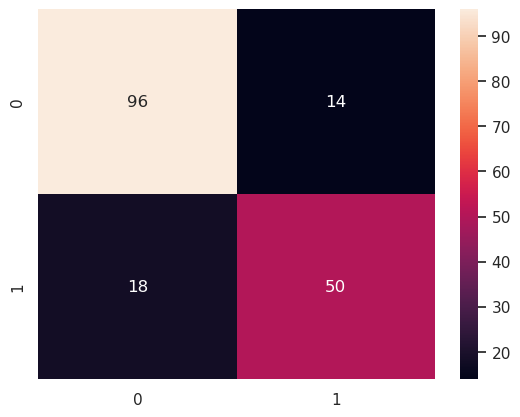

In [33]:
matrix = confusion_matrix(y_test, prediction)
sns.heatmap(matrix,annot=True)

# Cleaning the testing data

In [34]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [35]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [36]:
test.drop(['Name','Ticket','Cabin'], axis=1, inplace=True)

In [37]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [38]:
#Locating the one row where Fare which is missing

test.loc[(test['Fare'].isnull())]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
152,1044,3,male,60.5,0,0,NaN,S


In [39]:
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

<AxesSubplot:>

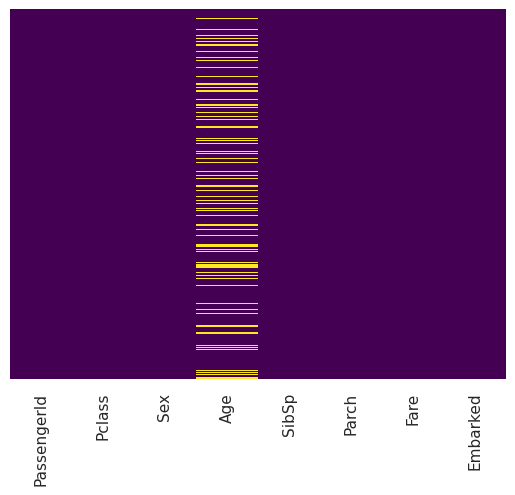

In [40]:
sns.heatmap(test.isna(),yticklabels=False,cmap='viridis', cbar=False)

In [41]:
test.loc[test['Age'].isnull()][['Age','Pclass']]

,Age,Pclass
10,NaN,3
22,NaN,1
29,NaN,3
33,NaN,3
36,NaN,3
...,...,...
408,NaN,3
410,NaN,3
413,NaN,3
416,NaN,3


In [42]:
#applying mean age function we created above to test datframe
test['Age'] = test[['Age','Pclass']].apply(mean_age, axis=1)

In [43]:
# hence the data is cleaned and has 418 rows 
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [44]:
# converting categorical features
sex = pd.get_dummies(test['Sex'],drop_first=True)
embark = pd.get_dummies(test['Embarked'],drop_first=True)
test.drop(['Sex','Embarked'], axis=1, inplace=True)
test = pd.concat([test,sex,embark],axis=1)


# Finally making the required predictions 

In [45]:
pred_final = logrig.predict(test)

In [46]:
pred_final

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [47]:
final_submission = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':pred_final})

In [48]:
final_submission.to_csv('submission.csv', index=False)

In [49]:
final_submission_df = pd.read_csv('submission.csv')

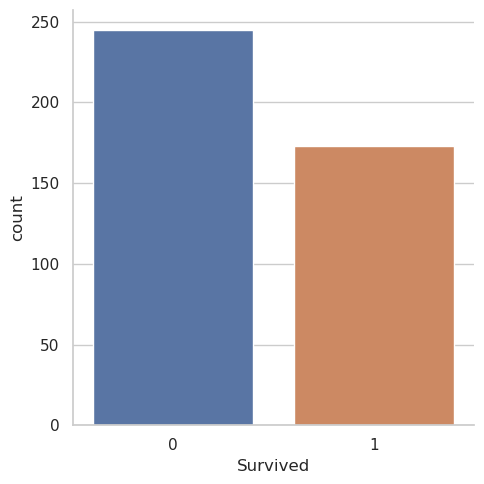

In [50]:
sns.catplot(kind='count',x='Survived',data=final_submission_df)